In [224]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [226]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")

In [228]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
titanic_data.shape

(891, 12)

In [232]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [234]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
titanic_data['Sex'].values


array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [238]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [240]:
titanic_data.drop('Cabin', inplace=True, axis=1)


In [242]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [244]:
titanic_data['Age'].fillna(titanic_data['Age'].mean())


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [246]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [248]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [250]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [252]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])



In [254]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [256]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


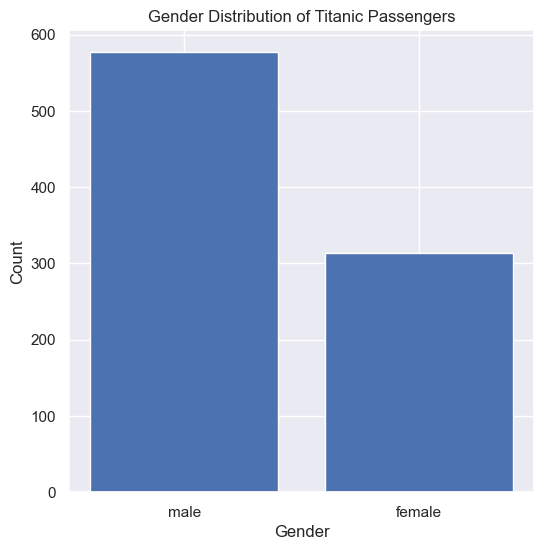

In [258]:
import matplotlib.pyplot as plt

# Data for gender distribution
gender_data = {
    'male': 577,
    'female': 314
}

# Labels and values for the bar chart
gender_labels = list(gender_data.keys())
gender_values = list(gender_data.values())

# Creating the bar chart with default colors
plt.figure(figsize=(6, 6))
plt.bar(gender_labels, gender_values)
plt.title('Gender Distribution of Titanic Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [259]:
sns.set()

In [260]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

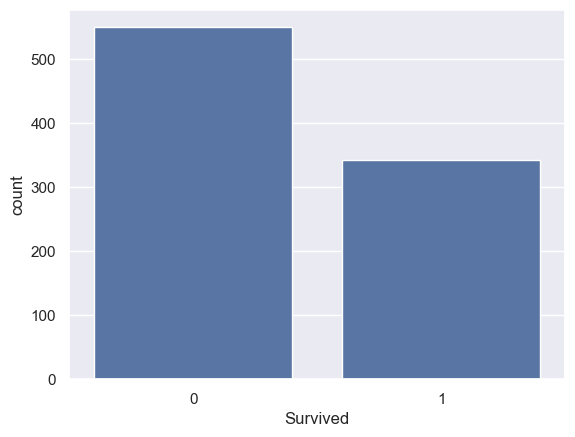

In [264]:
sns.countplot(x='Survived',data=titanic_data)

In [265]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

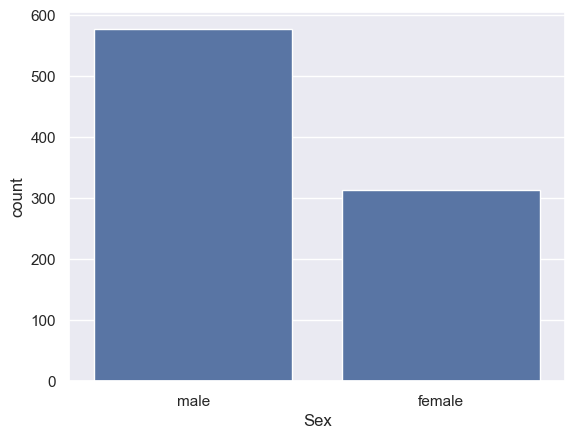

In [266]:
sns.countplot(x='Sex',data=titanic_data)

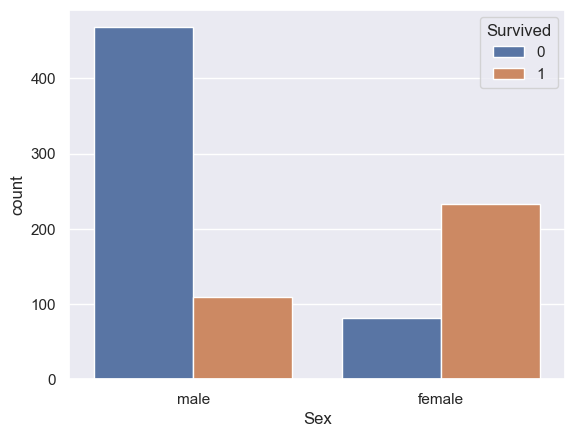

In [269]:
# number of survivers Gender wise
# Convert 'Survived' column to string type
titanic_data['Survived'] = titanic_data['Survived'].astype(str)

# Create the count plot
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.show()

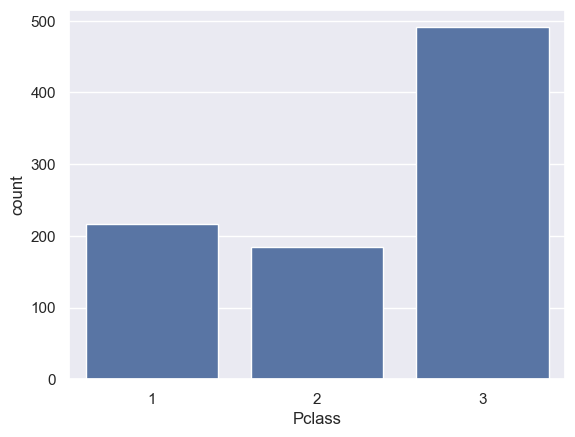

In [270]:
sns.countplot(x='Pclass',data=titanic_data)
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

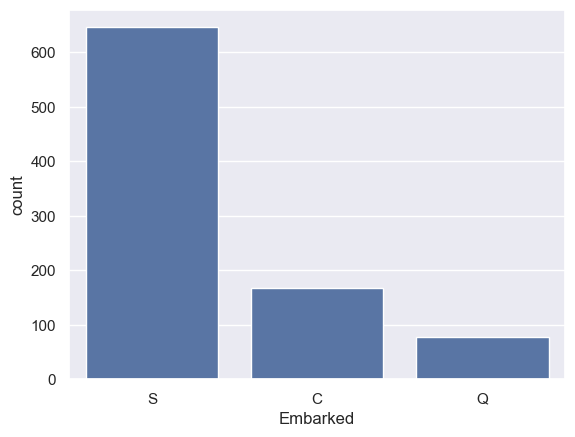

In [272]:
sns.countplot(x='Embarked',data=titanic_data)


<Axes: xlabel='Age', ylabel='Count'>

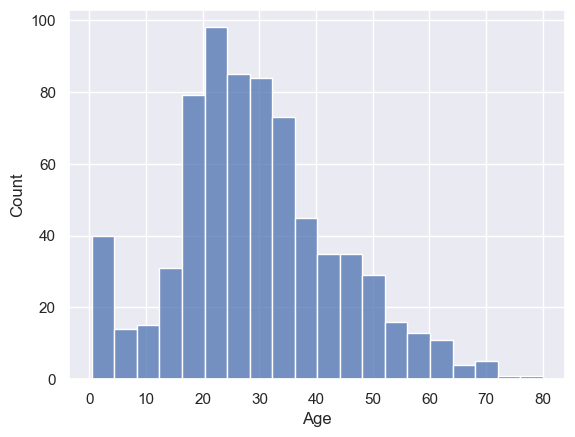

In [273]:
#Checking numerical attributes
sns.histplot(titanic_data['Age'])

In [274]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [276]:
## drop unnecessary columns
titanic_data = titanic_data.drop(columns=['Name', 'Ticket'], axis=1)
titanic_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [278]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [280]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

In [281]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [284]:
for col in cols:
    titanic_data[col] = le.fit_transform(titanic_data[col])
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [290]:
X = titanic_data.drop(columns = ['PassengerId','Survived'],axis=1)
Y = titanic_data['Survived']


In [292]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0   NaN      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]


In [294]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [296]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [298]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [300]:
model = LogisticRegression(max_iter=200)

In [302]:
from sklearn.impute import SimpleImputer

# Replace missing values with the mean (or any strategy you choose)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Fit the model with the imputed data
model.fit(X_train_imputed, Y_train)


LogisticRegression(max_iter=200)

In [304]:
X_train_prediction = model.predict(X_train_imputed)

In [306]:
print(X_train_prediction)

['0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0'
 '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '1' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0'
 '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1'
 '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0

In [308]:
trainning_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [310]:
# Impute missing values in X_test using the already fitted imputer
X_test_imputed = imputer.transform(X_test)

# Now make predictions using the imputed test data
X_test_prediction = model.predict(X_test_imputed)


In [327]:
print(X_test_prediction)

['0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0'
 '1' '0' '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '1' '0' '1' '1' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '0' '1' '1' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0']


In [329]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [331]:
print(test_data_accuracy)

0.7877094972067039
